In [23]:
import numpy as np
import pandas as pd
from copy import deepcopy
k=3
import random as rd
import matplotlib.pyplot as plt
import os

In [31]:
X = pd.read_csv(r"C:\Users\DEEPIKA\Downloads\kmeans.csv")

In [26]:
pwd

'C:\\Users\\DEEPIKA'

In [32]:
print(X)

    X1   X2
0  5.9  3.2
1  4.6  2.9
2  6.2  2.8
3  4.7  3.2
4  5.5  4.2
5  5.0  3.0
6  4.9  3.1
7  6.7  3.1
8  5.1  3.8
9  6.0  3.0


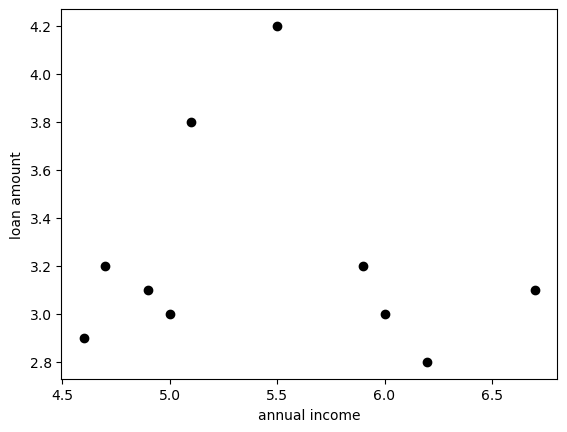

In [35]:
X=X[['X1','X2']]
#visualising data points
plt.scatter(X['X1'],X['X2'],c='black')
plt.xlabel('annual income')
plt.ylabel('loan amount')
plt.show()

In [36]:
x1=X['X1'].values
x2=X['X2'].values

In [37]:
x1

array([5.9, 4.6, 6.2, 4.7, 5.5, 5. , 4.9, 6.7, 5.1, 6. ])

In [38]:
x2

array([3.2, 2.9, 2.8, 3.2, 4.2, 3. , 3.1, 3.1, 3.8, 3. ])

In [39]:
X=np.array(list(zip(x1,x2)))

In [42]:
print(X)

[[5.9 3.2]
 [4.6 2.9]
 [6.2 2.8]
 [4.7 3.2]
 [5.5 4.2]
 [5.  3. ]
 [4.9 3.1]
 [6.7 3.1]
 [5.1 3.8]
 [6.  3. ]]


In [43]:
C_x=[6.2,6.6,6.5]
C_y=[3.2,3.7,3.0]

In [47]:
centroid=np.array(list(zip(C_x,C_y)),dtype=np.float32)
print("initial centroids")
print(centroid.shape)

initial centroids
(3, 2)


In [48]:
centroid

array([[6.2, 3.2],
       [6.6, 3.7],
       [6.5, 3. ]], dtype=float32)

In [50]:
centroid_old = np.zeros(centroid.shape)
print(centroid_old)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [51]:
clusters = np.zeros(len(X))
print(clusters)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [52]:
[0,1,2,0,0,1,2,1,1,0]

[0, 1, 2, 0, 0, 1, 2, 1, 1, 0]

In [53]:
def euclidean(a,b, ax=1):
 return np.linalg.norm(a-b, axis=ax)

In [57]:
error = euclidean(centroid, centroid_old,None)
print(error)

12.537144692236463


In [58]:
iterr = 0

In [60]:
while error != 0:
    # Assigning each value to its closest cluster
    iterr = iterr + 1
    for i in range(len(X)):
        #print("Data Points")
        #print(X[i])
        distances = euclidean(X[i], centroid)
        #print("Distances")
        #print(distances)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    centroid_old = deepcopy(centroid)
    print("Old Centroid")
    print(centroid_old)

    # Finding the new centroids by taking the Mean
    for p in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == p]
        centroid[p] = np.mean(points, axis=0)
    print(" New Centroids after ", iterr," Iteration \n", centroid)
    error = euclidean(centroid, centroid_old, None)
    print("Error ... ",error)
    print("Data points belong to which cluster")
    print(clusters)
    print("********************************************************")

Old Centroid
[[6.2 3.2]
 [6.6 3.7]
 [6.5 3. ]]
 New Centroids after  2  Iteration 
 [[5.1714287 3.1714287]
 [5.5       4.2      ]
 [6.45      2.95     ]]
Error ...  1.5886393
Data points belong to which cluster
[0. 0. 2. 0. 1. 0. 0. 2. 0. 0.]
********************************************************
Old Centroid
[[5.1714287 3.1714287]
 [5.5       4.2      ]
 [6.45      2.95     ]]
 New Centroids after  3  Iteration 
 [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
Error ...  0.5484787
Data points belong to which cluster
[2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]
********************************************************
Old Centroid
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
 New Centroids after  4  Iteration 
 [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
Error ...  0.0
Data points belong to which cluster
[2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]
********************************************************


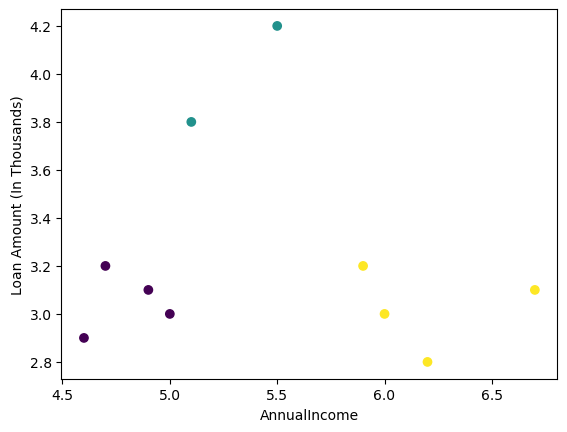

In [63]:
X = pd.read_csv(r"C:\Users\DEEPIKA\Downloads\kmeans.csv")
X = X[["X1","X2"]]
#Visualise data points
plt.scatter(X["X1"],X["X2"],c=clusters)
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()